In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [5]:
data.isnull().sum() // see the null values

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [7]:
data.isna().mean()

Country      0.0
Age          0.1
Salary       0.1
Purchased    0.0
dtype: float64

In [13]:
data.isnull().sum().sum()/data.values.size

0.05

In [15]:
data

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [14]:
data.dropna()

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [16]:
data.dropna(axis=1)

Country Purchased
0   France        No
1    Spain       Yes
2  Germany        No
3    Spain        No
4  Germany       Yes
5   France       Yes
6    Spain        No
7   France       Yes
8  Germany        No
9   France       Yes

In [17]:
data.fillna(0)

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      0.0       Yes
5   France  35.0  58000.0       Yes
6    Spain   0.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

<AxesSubplot:>

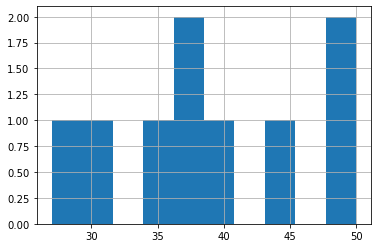

In [19]:
data['Age'].hist()

In [21]:
data.fillna({'Age':data['Age'].median(), 'Salary':data['Salary'].median()})

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0  61000.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  38.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [22]:
# imputer class

In [2]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [25]:
imputer.fit(data[['Age', 'Salary']])

SimpleImputer(strategy='median')

In [26]:
imputer.transform(data[['Age', 'Salary']])

array([[4.4e+01, 7.2e+04],
       [2.7e+01, 4.8e+04],
       [3.0e+01, 5.4e+04],
       [3.8e+01, 6.1e+04],
       [4.0e+01, 6.1e+04],
       [3.5e+01, 5.8e+04],
       [3.8e+01, 5.2e+04],
       [4.8e+01, 7.9e+04],
       [5.0e+01, 8.3e+04],
       [3.7e+01, 6.7e+04]])

In [28]:
imputer.fit_transform(data[['Age', 'Salary']])

array([[4.4e+01, 7.2e+04],
       [2.7e+01, 4.8e+04],
       [3.0e+01, 5.4e+04],
       [3.8e+01, 6.1e+04],
       [4.0e+01, 6.1e+04],
       [3.5e+01, 5.8e+04],
       [3.8e+01, 5.2e+04],
       [4.8e+01, 7.9e+04],
       [5.0e+01, 8.3e+04],
       [3.7e+01, 6.7e+04]])

In [27]:
pd.DataFrame(imputer.transform(data[['Age', 'Salary']]), columns=['Age', 'Salary'])

Age   Salary
0  44.0  72000.0
1  27.0  48000.0
2  30.0  54000.0
3  38.0  61000.0
4  40.0  61000.0
5  35.0  58000.0
6  38.0  52000.0
7  48.0  79000.0
8  50.0  83000.0
9  37.0  67000.0

In [45]:
data['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder()

In [43]:
ohe.fit_transform(data[['Country']]).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [39]:
sorted(data['Country'].unique())

['France', 'Germany', 'Spain']

In [46]:
country_enc = pd.DataFrame(ohe.fit_transform(data[['Country']]).toarray(), columns=sorted(data['Country'].unique()))

In [47]:
country_enc

France  Germany  Spain
0     1.0      0.0    0.0
1     0.0      0.0    1.0
2     0.0      1.0    0.0
3     0.0      0.0    1.0
4     0.0      1.0    0.0
5     1.0      0.0    0.0
6     0.0      0.0    1.0
7     1.0      0.0    0.0
8     0.0      1.0    0.0
9     1.0      0.0    0.0

In [41]:
data

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [50]:
pd.concat([data, country_enc], axis=1)

Country   Age   Salary Purchased  France  Germany  Spain
0   France  44.0  72000.0        No     1.0      0.0    0.0
1    Spain  27.0  48000.0       Yes     0.0      0.0    1.0
2  Germany  30.0  54000.0        No     0.0      1.0    0.0
3    Spain  38.0  61000.0        No     0.0      0.0    1.0
4  Germany  40.0      NaN       Yes     0.0      1.0    0.0
5   France  35.0  58000.0       Yes     1.0      0.0    0.0
6    Spain   NaN  52000.0        No     0.0      0.0    1.0
7   France  48.0  79000.0       Yes     1.0      0.0    0.0
8  Germany  50.0  83000.0        No     0.0      1.0    0.0
9   France  37.0  67000.0       Yes     1.0      0.0    0.0

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [54]:
data['Purchased Enc'] = le.fit_transform(data[['Purchased']])

C:\Users\Abhilash.Chauhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
data

Country   Age   Salary Purchased  Purchased Enc
0   France  44.0  72000.0        No              0
1    Spain  27.0  48000.0       Yes              1
2  Germany  30.0  54000.0        No              0
3    Spain  38.0  61000.0        No              0
4  Germany  40.0      NaN       Yes              1
5   France  35.0  58000.0       Yes              1
6    Spain   NaN  52000.0        No              0
7   France  48.0  79000.0       Yes              1
8  Germany  50.0  83000.0        No              0
9   France  37.0  67000.0       Yes              1

In [57]:
data.select_dtypes('O')

Country Purchased
0   France        No
1    Spain       Yes
2  Germany        No
3    Spain        No
4  Germany       Yes
5   France       Yes
6    Spain        No
7   France       Yes
8  Germany        No
9   France       Yes